<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_0_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,0.225994,200.849687,200.741042,0.108644
1,0.0,1.0,57.329540,67.934475,53.739469,0.526308,189.529792,188.948556,0.581237
2,0.0,2.0,45.215694,51.000161,43.520343,0.079801,149.815999,149.886142,-0.070143
3,0.0,3.0,69.375325,41.455180,64.082408,-1.214214,183.698698,185.068470,-1.369771
4,0.0,4.0,87.837297,72.508079,90.676124,-0.118577,260.902924,260.784234,0.118689
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.382293,66.593046,92.098096,0.600528,212.673963,212.078702,0.595262
19996,999.0,16.0,62.971081,59.155436,22.434296,0.716459,155.277272,154.522272,0.755000
19997,999.0,17.0,37.323768,53.799677,46.207262,0.024566,147.355273,147.291190,0.064083
19998,999.0,18.0,42.204721,36.635143,97.635290,0.118346,186.593500,186.386396,0.207104


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.854520  40.586643  81.182530  0.225994  200.849687   
      1.0    57.329540  67.934475  53.739469  0.526308  189.529792   
      2.0    45.215694  51.000161  43.520343  0.079801  149.815999   
      3.0    69.375325  41.455180  64.082408 -1.214214  183.698698   
      4.0    87.837297  72.508079  90.676124 -0.118577  260.902924   
...                ...        ...        ...       ...         ...   
999.0 15.0   43.382293  66.593046  92.098096  0.600528  212.673963   
      16.0   62.971081  59.155436  22.434296  0.716459  155.277272   
      17.0   37.323768  53.799677  46.207262  0.024566  147.355273   
      18.0   42.204721  36.635143  97.635290  0.118346  186.593500   
      19.0   88.522268  25.681428  82.018999 -0.415029  205.807666   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    200.741042  0.108644  
      1.0    188.948556  0.581237  
      2.0    149.886142 -0.070143  
      3.0    185.068470 -1.369771  
      4.0    260.784234  0.118689  
...                 ...       ...  
999.0 15.0   212.078702  0.595262  
      16.0   154.522272  0.755000  
      17.0   147.291190  0.064083  
      18.0   186.386396  0.207104  
      19.0   206.074142 -0.266476  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.854520  40.586643  81.182530  0.225994  200.849687   
      1.0    57.329540  67.934475  53.739469  0.526308  189.529792   
      2.0    45.215694  51.000161  43.520343  0.079801  149.815999   
      3.0    69.375325  41.455180  64.082408 -1.214214  183.698698   
      4.0    87.837297  72.508079  90.676124 -0.118577  260.902924   
...                ...        ...        ...       ...         ...   
999.0 15.0   43.382293  66.593046  92.098096  0.600528  212.673963   
      16.0   62.971081  59.155436  22.434296  0.716459  155.277272   
      17.0   37.323768  53.799677  46.207262  0.024566  147.355273   
      18.0   42.204721  36.635143  97.635290  0.118346  186.593500   
      19.0   88.522268  25.681428  82.018999 -0.415029  205.807666   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    200.741042  0.108644  
      1.0    188.948556  0.581237  
      2.0    149.886142 -0.070143  
      3.0    185.068470 -1.369771  
      4.0    260.784234  0.118689  
...                 ...       ...  
999.0 15.0   212.078702  0.595262  
      16.0   154.522272  0.755000  
      17.0   147.291190  0.064083  
      18.0   186.386396  0.207104  
      19.0   206.074142 -0.266476  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,0.225994,200.849687,200.741042,0.108644
1,0.0,1.0,57.329540,67.934475,53.739469,0.526308,189.529792,188.948556,0.581237
2,0.0,2.0,45.215694,51.000161,43.520343,0.079801,149.815999,149.886142,-0.070143
3,0.0,3.0,69.375325,41.455180,64.082408,-1.214214,183.698698,185.068470,-1.369771
4,0.0,4.0,87.837297,72.508079,90.676124,-0.118577,260.902924,260.784234,0.118689
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.382293,66.593046,92.098096,0.600528,212.673963,212.078702,0.595262
19996,999.0,16.0,62.971081,59.155436,22.434296,0.716459,155.277272,154.522272,0.755000
19997,999.0,17.0,37.323768,53.799677,46.207262,0.024566,147.355273,147.291190,0.064083
19998,999.0,18.0,42.204721,36.635143,97.635290,0.118346,186.593500,186.386396,0.207104


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.854520  40.586643  81.182530  0.225994  200.849687   
      1.0    57.329540  67.934475  53.739469  0.526308  189.529792   
      2.0    45.215694  51.000161  43.520343  0.079801  149.815999   
      3.0    69.375325  41.455180  64.082408 -1.214214  183.698698   
      4.0    87.837297  72.508079  90.676124 -0.118577  260.902924   
...                ...        ...        ...       ...         ...   
999.0 15.0   43.382293  66.593046  92.098096  0.600528  212.673963   
      16.0   62.971081  59.155436  22.434296  0.716459  155.277272   
      17.0   37.323768  53.799677  46.207262  0.024566  147.355273   
      18.0   42.204721  36.635143  97.635290  0.118346  186.593500   
      19.0   88.522268  25.681428  82.018999 -0.415029  205.807666   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    200.741042  0.108644  
      1.0    188.948556  0.581237  
      2.0    149.886142 -0.070143  
      3.0    185.068470 -1.369771  
      4.0    260.784234  0.118689  
...                 ...       ...  
999.0 15.0   212.078702  0.595262  
      16.0   154.522272  0.755000  
      17.0   147.291190  0.064083  
      18.0   186.386396  0.207104  
      19.0   206.074142 -0.266476  

[20000 rows x 7 columns]

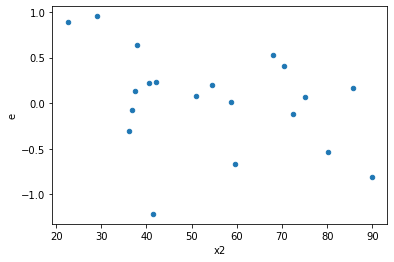

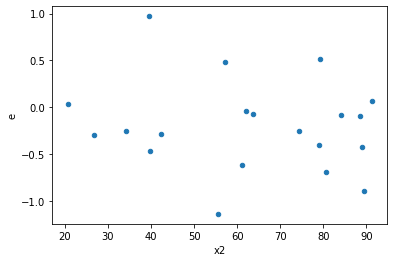

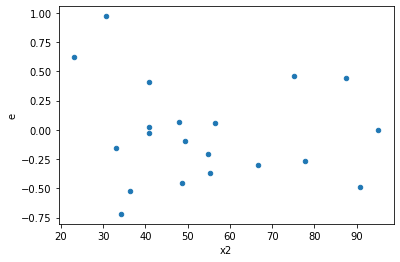

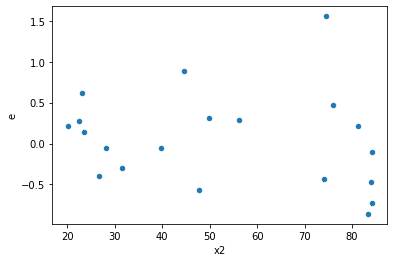

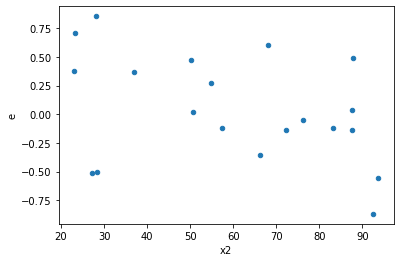

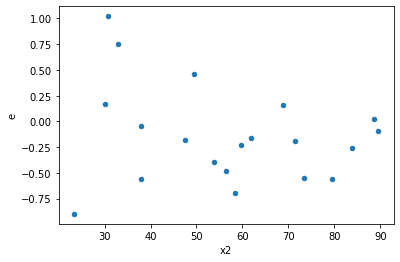

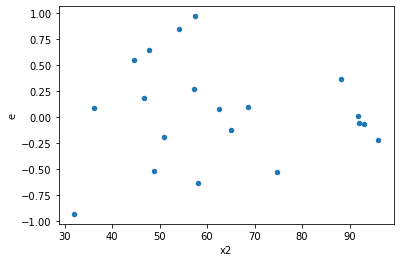

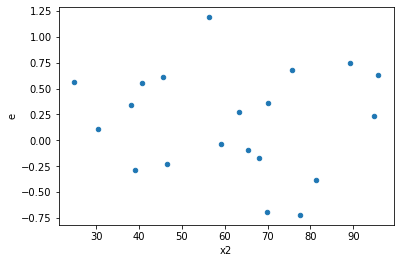

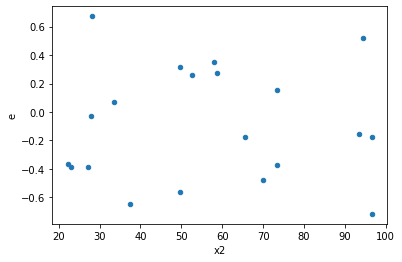

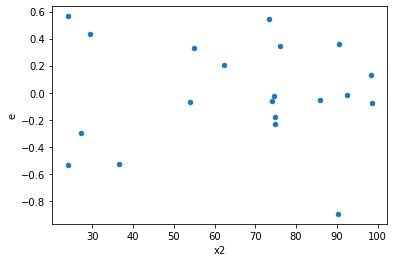

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,3.0,11.0,0.22351648388230166,2.583109931391499,0.07450549462743389,0.23482817558104535,3.1518235903983727,0.1371302534760055,0.9314348732619973,0.06856512673800275,Reject005=1 : Homoscedasticity
2.0,6.0,8.0,0.8977285318979129,1.3966698335210117,0.14962142198298548,0.17458372919012646,1.1668364521357084,0.8161347136666621,0.5919326431666689,0.40806735683333106,Reject005=1 : Homoscedasticity
6.0,10.0,4.0,1.2987272862697024,0.9155794423723886,0.12987272862697025,0.22889486059309716,1.762455159085364,0.615518102679925,0.6922409486600375,0.3077590513399625,Reject005=1 : Homoscedasticity
8.0,7.0,7.0,0.8044377776997704,1.0783825222241943,0.11491968252853864,0.15405464603202776,1.3405418692639577,0.7087751268979539,0.6456124365510231,0.3543875634489769,Reject005=1 : Homoscedasticity
10.0,5.0,9.0,0.19377512517218695,1.6809332964614425,0.03875502503443739,0.1867703662734936,4.819255467066039,0.04050083395936399,0.979749583020318,0.020250416979681995,Reject005=0 : Heteroscedasticity
11.0,8.0,6.0,1.3482204476966504,1.09880334076697,0.1685275559620813,0.18313389012782832,1.0866703019714679,0.9459710241346304,0.5270144879326848,0.4729855120673152,Reject005=1 : Homoscedasticity
16.0,6.0,8.0,0.3429016554874601,2.2676505804528073,0.057150275914576686,0.2834563225566009,4.959841715905047,0.04176703947267635,0.9791164802636618,0.020883519736338174,Reject005=0 : Heteroscedasticity
17.0,10.0,4.0,0.5114034977474616,0.3864756914415027,0.051140349774746165,0.09661892286037567,1.889289441428253,0.5654899178455064,0.7172550410772468,0.2827449589227532,Reject005=1 : Homoscedasticity
19.0,10.0,4.0,1.8533370351603162,2.3012371833522427,0.18533370351603162,0.5753092958380607,3.104180647791866,0.28628464117088925,0.8568576794145554,0.14314232058544463,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,3.0,3.7032345897271144,0.7346124985660424,0.33665768997519224,0.24487083285534747,0.7273585013709076,0.6031820167612207,Reject005=1 : Homoscedasticity
1.0,3.0,11.0,0.22351648388230166,2.583109931391499,0.07450549462743389,0.23482817558104535,3.1518235903983727,0.1371302534760055,Reject005=1 : Homoscedasticity
2.0,6.0,8.0,0.8977285318979129,1.3966698335210117,0.14962142198298548,0.17458372919012646,1.1668364521357084,0.8161347136666621,Reject005=1 : Homoscedasticity
3.0,7.0,7.0,3.7150235666286737,0.9043135685079428,0.5307176523755248,0.12918765264399182,0.24342068153516272,0.08208310944663497,Reject005=1 : Homoscedasticity
4.0,5.0,9.0,1.7327595914033356,1.31159056412799,0.3465519182806671,0.14573228490311,0.42052078553229544,0.35297058512379526,Reject005=1 : Homoscedasticity
5.0,8.0,6.0,2.7167771342730154,0.1750134700846766,0.3395971417841269,0.029168911680779435,0.08589268898888835,0.002818259142274812,Reject005=0 : Heteroscedasticity
6.0,10.0,4.0,1.2987272862697024,0.9155794423723886,0.12987272862697025,0.22889486059309716,1.762455159085364,0.615518102679925,Reject005=1 : Homoscedasticity
7.0,9.0,5.0,2.684998213469613,0.38396148706118965,0.298333134829957,0.07679229741223793,0.25740452013822657,0.07476180673089296,Reject005=1 : Homoscedasticity
8.0,7.0,7.0,0.8044377776997704,1.0783825222241943,0.11491968252853864,0.15405464603202776,1.3405418692639577,0.7087751268979539,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      787
Reject005=0 : Heteroscedasticity    213
Name: Result_test, dtype: int64